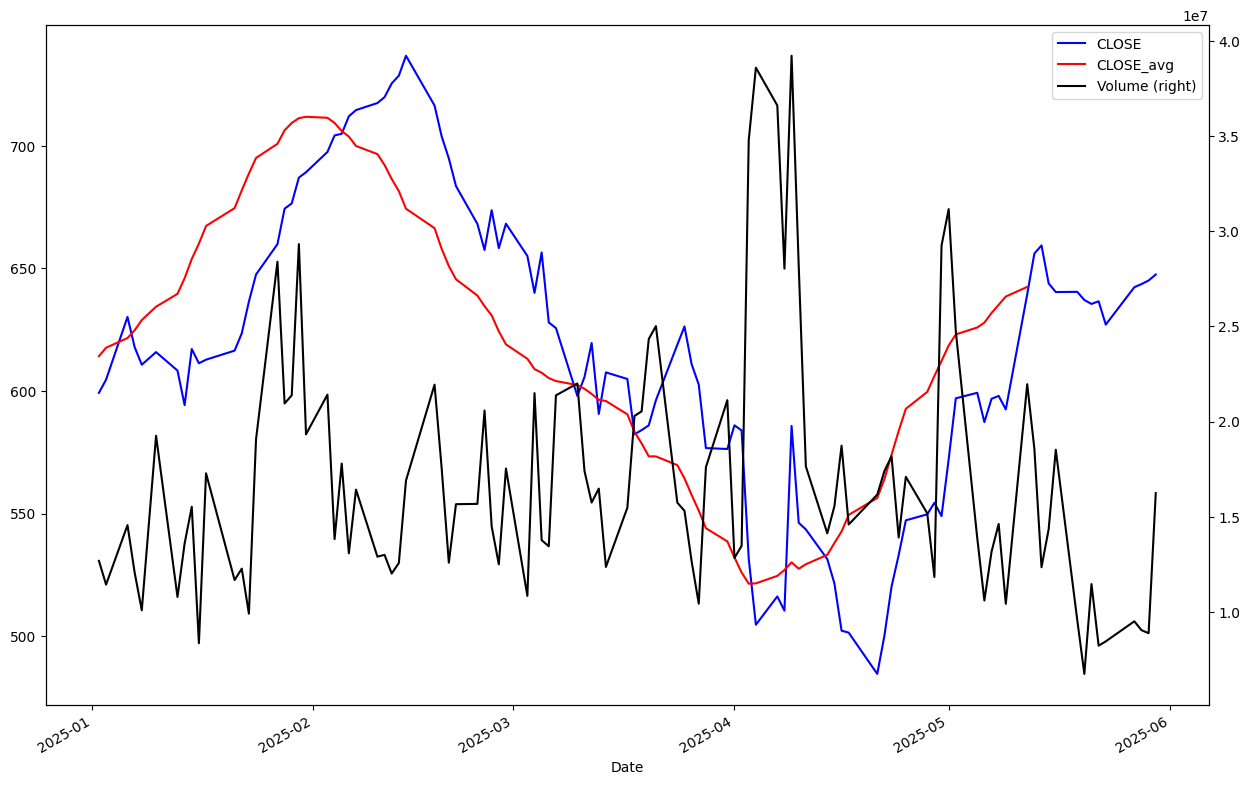

In [12]:
import pandas as pd
from pathlib import Path

data_path = Path('data_M08/fb_2025.csv').resolve()

def remove_dollar(data: str) -> float:
    return float(data.replace('$', ''))

df = pd.read_csv(
    data_path,
    parse_dates=['Date'],
    index_col='Date',
    engine='python',
    
).rename(columns={
         'Close/Last':'CLOSE'
}).assign(
    CLOSE=lambda x: x['CLOSE'].map(remove_dollar),
    Open = lambda x: x['Open'].map(remove_dollar),
    High = lambda x: x['High'].map(remove_dollar),
    Low = lambda x: x['Low'].map(remove_dollar),
    CLOSE_avg = lambda x: x['CLOSE'].rolling(14).mean()
).sort_values(
    by='Date',
    ascending=True
)['2025':'2025'].plot(y=['CLOSE', 'CLOSE_avg', 'Volume'],
                      secondary_y='Volume',
                      style=['b-', 'r-', 'k-'],
                      figsize=(15, 10));